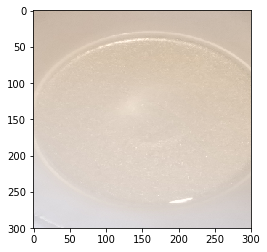

Added img num 1 as clean
Added img num 2 as clean
Added img num 3 as clean
Added img num 4 as clean
Added img num 5 as clean
Added img num 6 as clean
Added img num 7 as clean
Added img num 8 as clean
Added img num 9 as clean
Added img num 10 as clean
Added img num 11 as clean
Added img num 12 as clean
Added img num 13 as clean
Added img num 14 as clean
Added img num 15 as clean
Added img num 16 as clean
Added img num 17 as clean
Added img num 18 as clean
Added img num 19 as clean
Added img num 20 as clean
Added img num 21 as clean
Added img num 22 as clean
Added img num 23 as clean
Added img num 24 as clean
Added img num 25 as clean
Added img num 26 as clean
Added img num 27 as clean
Added img num 28 as clean
Added img num 29 as clean
Added img num 30 as clean
Added img num 31 as clean
Added img num 32 as clean
Added img num 33 as clean
Added img num 34 as clean
Added img num 35 as clean
Added img num 36 as contaminated
Added img num 37 as contaminated
Added img num 38 as contaminated


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "E:/Users/Elliott/dev/aquavision_project/AquaVision Image Data/Research Data"
CATEGORIES = ['Clean', 'Contaminated']

# for num, img in enumerate(os.listdir(DATADIR), start=1):
#     img_array = cv2.imread(os.path.join(DATADIR, img))
#     plt.imshow(img_array, cmap='Accent')
#     plt.show()
#     break


training_data = []
IMG_SIZE = 300

def create_training_dataset():
    for num, img in enumerate(os.listdir(DATADIR), start=1):
        try:
            img_arr = cv2.imread(os.path.join(DATADIR, img))
            RGB_ver = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
            new_img_arr = cv2.resize(RGB_ver, (IMG_SIZE, IMG_SIZE))
            if(num == 1):
                plt.imshow(new_img_arr)
                plt.show()
            if(num <= 35):
                # Second parameter is class num 0 for clean
                training_data.append([new_img_arr, 0])
                print("Added img num {} as clean".format(num))
            else:
                # Second parameter is class num 1 for dirty
                training_data.append([new_img_arr, 1])
                print("Added img num {} as contaminated".format(num))
        except Exception as e:
            print(e)

#  Run function to create our training data
create_training_dataset()
print(len(training_data))


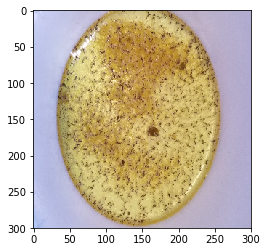

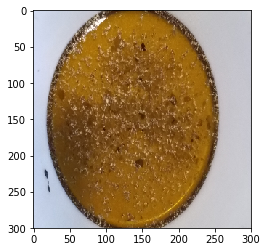

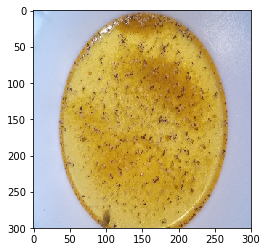

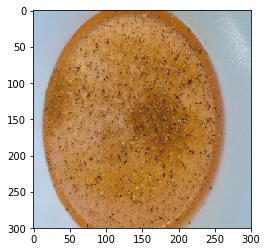

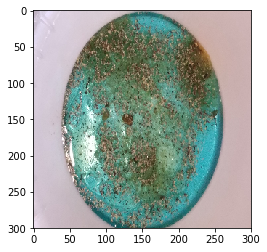

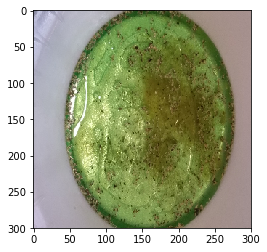

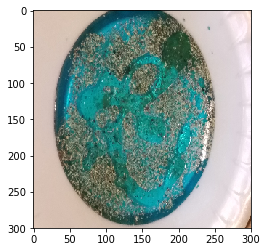

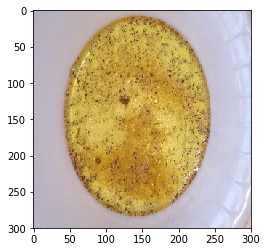

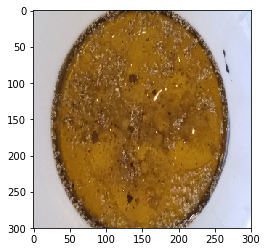

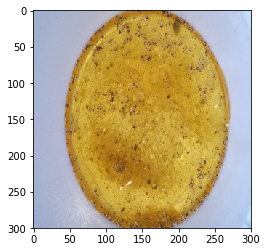

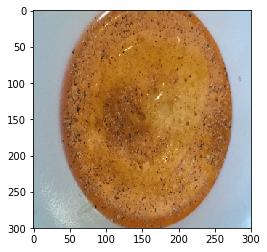

In [11]:
for k in range(80, 91):
    plt.imshow(training_data[k][0])
    plt.show()
# print(len(training_data[1][0]))


In [12]:
# Randomize the data so that it is not in order of clean-then-contaiminated
# If not randomized, could potentially cause issues with the model
import random
random.shuffle(training_data)
for x in training_data:
    print(x[1])

1
1
1
0
1
0
1
0
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
1
0
0
1
1
1
1
0
1
1
0
0
1
1
0
1
1
1
0
0
1
0
1
0
0
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
0
0
1
0
1
1
0
0
0
1
0
1
0
1
0
0
1
1
1
1
1
1
1
0
1


In [13]:
# Reformat data using an numpy array to export it using pickle
X_features = [] # Training data
y_labels = [] # Labels/classifiers for the data
for feature, label in training_data:
    X_features.append(feature)
    y_labels.append(label)
    
X_features = np.array(X_features).reshape(-1, IMG_SIZE, IMG_SIZE, 3) # change 1 to a 3 for RGB 
# since there are 3 colors for RGB instead of one
    

In [14]:
import pickle

# Create pickle files for the data/labels
pickle_out = open("X_features.pickle", "wb")
pickle.dump(X_features, pickle_out)
pickle_out.close()

pickle_out = open("y_labels.pickle", "wb")
pickle.dump(y_labels, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X_features.pickle", "rb")
X_features = pickle.load(pickle_in)
print(X_features[0])

[[[212 204 228]
  [212 204 228]
  [212 204 228]
  ...
  [225 214 231]
  [237 226 243]
  [227 217 234]]

 [[211 203 227]
  [211 203 227]
  [213 205 229]
  ...
  [213 201 223]
  [225 214 231]
  [219 208 225]]

 [[212 202 226]
  [211 203 226]
  [216 206 230]
  ...
  [211 199 217]
  [209 198 215]
  [209 198 215]]

 ...

 [[194 182 196]
  [195 182 198]
  [195 183 197]
  ...
  [175 180 220]
  [173 178 216]
  [177 182 220]]

 [[211 198 208]
  [192 179 193]
  [195 183 197]
  ...
  [174 176 215]
  [177 179 218]
  [175 177 216]]

 [[249 236 243]
  [215 202 211]
  [192 180 192]
  ...
  [175 177 216]
  [175 176 215]
  [173 175 213]]]


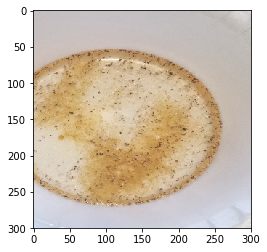

In [17]:
plt.imshow(X_features[1])

In [18]:
print(X_features[1])

[[[196 192 193]
  [197 193 194]
  [195 191 192]
  ...
  [225 220 224]
  [222 217 221]
  [218 213 217]]

 [[196 192 193]
  [197 192 194]
  [194 190 191]
  ...
  [222 218 216]
  [221 216 220]
  [221 216 220]]

 [[195 191 192]
  [195 191 192]
  [194 191 191]
  ...
  [221 217 214]
  [219 215 216]
  [216 212 213]]

 ...

 [[203 220 238]
  [203 220 240]
  [202 219 239]
  ...
  [220 214 216]
  [223 217 219]
  [226 220 222]]

 [[205 222 242]
  [202 219 239]
  [204 221 241]
  ...
  [219 215 216]
  [222 213 216]
  [219 210 213]]

 [[203 221 243]
  [203 221 241]
  [205 222 242]
  ...
  [223 213 217]
  [220 211 214]
  [222 213 216]]]
